In [ ]:
#in case variables need to be cleared
%reset

In [371]:
#setup for first running
!pip3 install jupyter
!pip3 install ipykernel
!pip3 install ipython
!pip3 install pyarrow
!pip3 install scikit-learn
!conda deactivate #in case a conda environment is running
!source ./notebookenv/nbvenv_py3115/bin/activate   
!ipython kernel install --user --name=nbvenv_py3115  
!python3 -m ipykernel install --user --name=nbvenv_py3115

  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached notebook-7.0.8-py3-none-any.whl.metadata (10 kB)
  Using cached qtconsole-5.5.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
  Using cached nbconvert-7.16.0-py3-none-any.whl.metadata (7.7 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.0 kB)
  Using cached mistune-3.0.2-py3-none-any.wh

In [336]:
#virtual environment installed into this notebook's kernel list, so libraries should be ready to run
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [367]:
#stats from lower 48 CP fact sheets for 2018-2022
USA48 = pd.read_csv('data/lower48Output.csv')
#stats from CP sustainability reports for total USA processes 2018-2022
GHG_CP = pd.read_csv('data/USA_GHG_performance_data.csv');
GHG_CP = GHG_CP.dropna(how='all'); #drop spacer rows

In [357]:
USA48_r = USA48.drop(list(range(43,51))) #remove note rows.
USA48_r

,Unnamed: 0,2018,2019,2020,2021,2022
0,Eagle Ford,NaN,NaN,NaN,NaN,NaN
1,Crude Oil (MBD),109.000,125.000,103.000,116.000,117.000
2,Crude Oil (MMBY),39.785,45.625,37.595,42.340,42.705
3,Nat Gas (MMCFD),212.000,251.000,228.000,251.000,271.000
4,Nat Gas (MMMCFY),77.480,91.615,83.220,91.615,98.915
5,NGL (MBD),42.000,49.000,46.000,53.000,58.000
6,NGL (MMBY),15.330,17.885,16.790,19.345,21.170
7,Total MBOED,186.000,216.000,186.000,211.000,220.000
8,Total (MMBOEY),67.890,78.840,67.890,77.015,80.300
9,Bakken,NaN,NaN,NaN,NaN,NaN


In [358]:
U = USA48_r.to_numpy(copy=True) #convert to numpy as a copy

In [359]:
#conveniently, we have 3 areas of interest and 3 unknowns, making it possible for us to get an appx of the oil equiv for each substance per unit volume for each year. This way we can see if there is any noticeable difference from year to year
years = 5
types = 3
#So, we solve for MMBOEY (millions barrels of oil equivalent) of the three production types in our areas of interest

#crude, ng, ngl yearly outputs are the respective values of the columns, with each row representing an area of interest (AOI)

equivs = np.zeros(shape=(years,types))
#create variable size array since better for numpy performance than appending
for i in range(1,6):
    producedMatrix = np.array([
                [U[2][i],U[4][i],U[6][i]],
                [U[11][i],U[13][i],U[15][i]],
                [U[22][i],U[26][i],U[30][i]]
                ])
    MMBOEY = np.array(
                [U[8][i],U[17][i],U[34][i]])
    equivs[i-1] = np.linalg.solve(producedMatrix,MMBOEY)

In [360]:
equivalents_pd = pd.DataFrame(equivs, columns=['Crude Oil (MMB)','Natural Gas (MMMCF)', 'Natural Gas Liquids (MMB)'])
equivalents_pd.index = columns=USA48.columns[1:]

,Crude Oil (MMB),Natural Gas (MMMCF),Natural Gas Liquids (MMB)
count,5.000000,5.000000,5.000000
mean,0.983502,0.170926,1.010062
std,0.018587,0.010198,0.028340
min,0.960487,0.152838,0.972222
25%,0.974983,0.173853,0.998707
50%,0.985344,0.174506,1.003839
75%,0.985399,0.176303,1.031551
max,1.011297,0.177129,1.043992


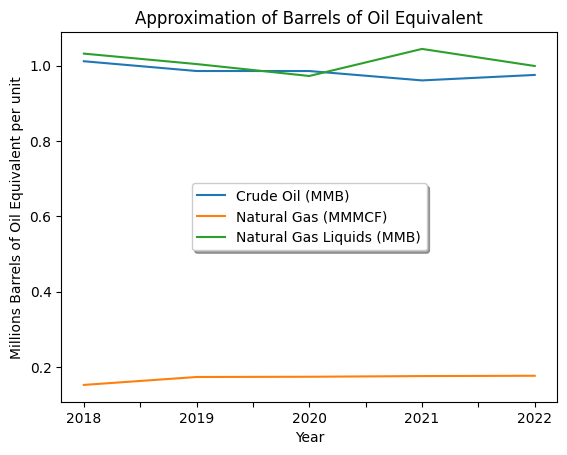

In [361]:
equivPlot = equivalents_pd.plot()
equivPlot.set_ylabel("Millions Barrels of Oil Equivalent per unit")
equivPlot.set_xlabel("Year")
equivPlot.legend(loc="center",shadow=True);
equivPlot.set_title("Approximation of Barrels of Oil Equivalent");
equivalents_pd.describe()

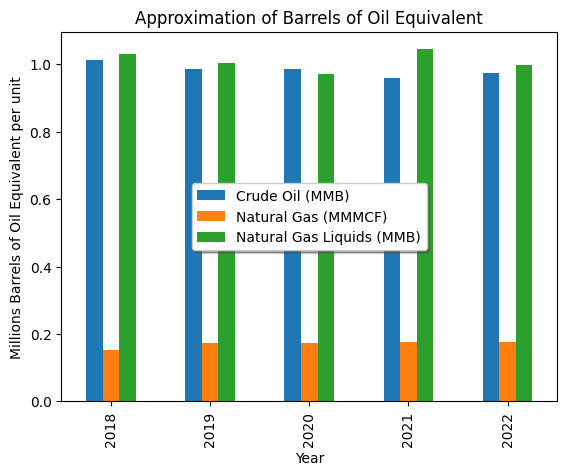

In [362]:
barPlot = equivalents_pd.plot.bar()
barPlot.set_ylabel("Millions Barrels of Oil Equivalent per unit")
barPlot.set_xlabel("Year")
barPlot.legend(loc="center",shadow=True);
barPlot.set_title("Approximation of Barrels of Oil Equivalent");


In [368]:
GHG_CP

,Year,2018,2019,2020,2021,2022
0,METRIC,NaN,NaN,NaN,NaN,NaN
2,CLIMATE AND AIR EMISSIONS,NaN,NaN,NaN,NaN,NaN
4,GHGs (thousand tonnes),NaN,NaN,NaN,NaN,NaN
5,CO2 from Operations,"5,000","5,900","4,600","6,200","6,129"
6,CO2 from Imported Electricity,600,600,400,600,711
7,Methane (CO2 equivalent),"1,400","1,600","1,500","1,600","1,593"
8,Nitrous Oxide (CO2 equivalent),0,0,0,10,8
9,Total Greenhouse Gases,"7,000","8,100","6,500","8,410","8,441"
11,"Flaring Volume (million cubic feet, routine an...","13,300","20,200","11,700","17,700","15,972"
13,Other Air Emissions (tonnes),NaN,NaN,NaN,NaN,NaN


In [ ]:
spliced = pd.DataFrame(GHG_CP